In [70]:
import lucem_illud_2020
import os 

In [71]:
import pandas as pd
from nltk import sent_tokenize, word_tokenize, pos_tag
import spacy
nlp = spacy.load("en_core_web_sm")
#nlp = spacy.load("en")
import numpy as np
import matplotlib

In [72]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.font_manager as font_manager
print(matplotlib.__version__)

3.2.1


In [73]:
import pandas as pd
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 10,7

In [75]:
import gc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.neighbors import KernelDensity
from scipy import stats

In [76]:

import warnings
#current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

%matplotlib inline
color = sns.color_palette() 

pd.set_option('display.max_rows', 15000)
pd.set_option('display.max_columns', 100)

In [77]:
%matplotlib inline

# Full Corpus

In [78]:
df = pd.read_csv('Corpus1a_tt-nt-ts-ns_cat-bools.csv')
df

,Unnamed: 0,Requester,Title,HITs,Reward,filename,tokenized_text,normalized_text,category,is_ML,tokenized_sents,normalized_sents
0,0,Sharmishtha Gupta,Watch TV clips and see if it's changing to/fro...,2,0.05,3-09_9-40.csv,"['Watch', 'TV', 'clips', 'and', 'see', 'if', '...","['watch', 'tv', 'clip', 'change', 'advertiseme...",ML,True,"[['Watch', 'TV', 'clips', 'and', 'see', 'if', ...","[['watch', 'tv', 'clips', 'changing', 'adverti..."
1,1,Panel,Extract purchased items from a shopping receip...,175,0.01,3-09_9-40.csv,"['Extract', 'purchased', 'items', 'from', 'a',...","['extract', 'purchase', 'item', 'shop', 'recei...",ML,True,"[['Extract', 'purchased', 'items', 'from', 'a'...","[['extract', 'purchased', 'items', 'shopping',..."
2,2,Panel,Extract purchased items from a shopping receipt,"3,327",0.08,3-09_9-40.csv,"['Extract', 'purchased', 'items', 'from', 'a',...","['extract', 'purchase', 'item', 'shop', 'recei...",ML,True,"[['Extract', 'purchased', 'items', 'from', 'a'...","[['extract', 'purchased', 'items', 'shopping',..."
3,3,Panel,Extract purchased items from a shopping receip...,99,0.01,3-09_9-40.csv,"['Extract', 'purchased', 'items', 'from', 'a',...","['extract', 'purchase', 'item', 'shop', 'recei...",ML,True,"[['Extract', 'purchased', 'items', 'from', 'a'...","[['extract', 'purchased', 'items', 'shopping',..."
4,4,Panel,Extract summary information from 24 shopping r...,18,0.05,3-09_9-40.csv,"['Extract', 'summary', 'information', 'from', ...","['extract', 'summary', 'information', 'shop', ...",ML,True,"[['Extract', 'summary', 'information', 'from',...","[['extract', 'summary', 'information', 'shoppi..."
...,...,...,...,...,...,...,...,...,...,...,...,...
71003,71003,LSAN,Answer a survey about faces and emotions.,1,0.35,3-22_4-00.csv,"['Answer', 'a', 'survey', 'about', 'faces', 'a...","['answer', 'survey', 'face', 'emotion']",OTHER,False,"[['Answer', 'a', 'survey', 'about', 'faces', '...","[['answer', 'survey', 'faces', 'emotions']]"
71004,71004,Clic2Buy,Sélectionner les meilleures informations pour ...,30,0.05,3-22_4-00.csv,"['Sélectionner', 'les', 'meilleures', 'informa...","['sélectionner', 'les', 'meilleures', 'informa...",OTHER,False,"[['Sélectionner', 'les', 'meilleures', 'inform...","[['sélectionner', 'les', 'meilleures', 'inform..."
71005,71005,Clic2Buy,Sélectionner les meilleures informations pour ...,54,0.04,3-22_4-00.csv,"['Sélectionner', 'les', 'meilleures', 'informa...","['sélectionner', 'les', 'meilleures', 'informa...",OTHER,False,"[['Sélectionner', 'les', 'meilleures', 'inform...","[['sélectionner', 'les', 'meilleures', 'inform..."
71006,71006,Clic2Buy,Sélectionner les meilleures informations pour ...,52,0.03,3-22_4-00.csv,"['Sélectionner', 'les', 'meilleures', 'informa...","['sélectionner', 'les', 'meilleures', 'informa...",OTHER,False,"[['Sélectionner', 'les', 'meilleures', 'inform...","[['sélectionner', 'les', 'meilleures', 'inform..."


In [79]:
df['Reward'].describe()

count    71008.000000
mean         1.136468
std          2.158753
min          0.010000
25%          0.100000
50%          0.400000
75%          1.100000
max         25.000000
Name: Reward, dtype: float64

In [80]:
#full df reduced to Rewards column
dfR = df[["Reward"]].copy()
dfR

,Reward
0,0.05
1,0.01
2,0.08
3,0.01
4,0.05
...,...
71003,0.35
71004,0.05
71005,0.04
71006,0.03


In [81]:
#Rewards grouped by value
dfG = df.groupby(['Reward']).size().reset_index(name='Count') 
dfG = dfG.sort_values(["Count", "Reward"], ascending=[False, False]).reset_index(drop=True)
dfG

,Reward,Count
0,1.00,5623
1,0.10,4921
2,0.50,4776
3,0.01,4095
4,0.25,3982
5,0.05,3866
6,0.20,3099
7,3.00,2639
8,1.50,2280
9,0.03,2256


In [82]:
dfG.describe()

,Reward,Count
count,154.000000,154.000000
mean,2.540325,461.090909
std,3.810748,1009.204445
min,0.010000,1.000000
25%,0.405000,9.250000
50%,1.120000,53.500000
75%,2.787500,327.000000
max,25.000000,5623.000000


In [158]:
#linear regression
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

data = dfG  # load data set
X1 = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y1 = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X1, Y1)  # perform linear regression
Y1_pred = linear_regressor.predict(X1)  # make predictions

#plt.scatter(X1, Y1, color='green')
#plt.xlabel("Reward (Dollars USD)")
#plt.ylabel("Count")
#plt.plot(X1, Y1_pred, color='lime')
#plt.title('Linear Regression Plot (Full Corpus)')
#plt.show()

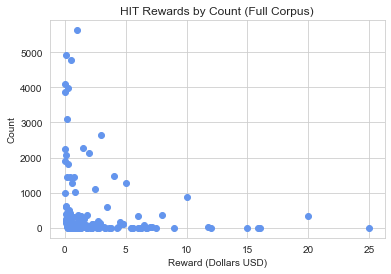

In [154]:
#Scatter Plot
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
data = dfG  # load data set
X1 = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y1 = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

plt.scatter(X1, Y1, color='cornflowerblue')
plt.xlabel("Reward (Dollars USD)")
plt.ylabel("Count")
plt.title('HIT Rewards by Count (Full Corpus)')
plt.show()

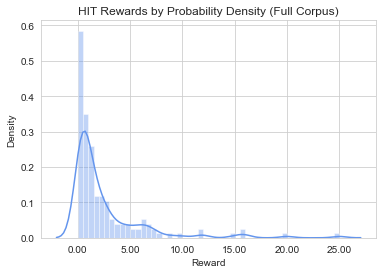

In [177]:
#density plot
plt.xlabel('Reward (Dolars USD)')
plt.ylabel('Density')
plt.title('HIT Rewards by Probability Density (Full Corpus)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,100))

from matplotlib.ticker import FormatStrFormatter

sns.distplot(dfG.Reward, bins=50, color='cornflowerblue').xaxis.set_major_formatter(FormatStrFormatter('%.2f'))


# Top Rewards Subcorpus

In [86]:
tr = pd.read_csv('df_topRewards.csv')
tr

,Requester,Title,HITs,Reward,filename,tokenized_text,normalized_text,category,is_ML,tokenized_sents,normalized_sents,sentences
0,SurveyComet,Survey - webcam & audio recording required(~ 2...,23,10.00,3-17_2-00.csv,"['Survey', 'webcam', 'audio', 'recording', 're...","['survey', 'webcam', 'audio', 'record', 'requi...",ML,True,"[['Survey', 'webcam', 'audio', 'recording', 'r...","[['survey', 'webcam', 'audio', 'record', 'requ...","[['Survey', '-', 'webcam', '&', 'audio', 'reco..."
1,SurveyComet,Compensation HIT for A1ZLHNJEURLK3O(~ 1 minutes),1,10.00,3-16_11-00.csv,"['Compensation', 'HIT', 'for', 'A1ZLHNJEURLK3O...","['compensation', 'hit', 'a1zlhnjeurlk3o(~', 'm...",OTHER,False,"[['Compensation', 'HIT', 'for', 'A1ZLHNJEURLK3...","[['compensation', 'hit', 'a1zlhnjeurlk3o(~', '...","[['Compensation', 'HIT', 'for', 'A1ZLHNJEURLK3..."
2,SurveyComet,Survey - webcam & audio recording required(~ 2...,23,10.00,3-20_2-00.csv,"['Survey', 'webcam', 'audio', 'recording', 're...","['survey', 'webcam', 'audio', 'record', 'requi...",ML,True,"[['Survey', 'webcam', 'audio', 'recording', 'r...","[['survey', 'webcam', 'audio', 'record', 'requ...","[['Survey', '-', 'webcam', '&', 'audio', 'reco..."
3,"Hoag,Marisha",Face Attractiveness Categorization ( 人脸吸引力分类),1,10.00,3-20_4-00.csv,"['Face', 'Attractiveness', 'Categorization', '...","['face', 'attractiveness', 'categorization', '...",OTHER,False,"[['Face', 'Attractiveness', 'Categorization', ...","[['face', 'attractiveness', 'categorization', ...","[['Face', 'Attractiveness', 'Categorization', ..."
4,SurveyComet,Survey - webcam & audio recording required(~ 2...,21,10.00,3-13_1-00.csv,"['Survey', 'webcam', 'audio', 'recording', 're...","['survey', 'webcam', 'audio', 'record', 'requi...",ML,True,"[['Survey', 'webcam', 'audio', 'recording', 'r...","[['survey', 'webcam', 'audio', 'record', 'requ...","[['Survey', '-', 'webcam', '&', 'audio', 'reco..."
5,"Hoag,Marisha",Face Attractiveness Categorization ( 人脸吸引力分类) #2,1,10.00,3-20_4-00.csv,"['Face', 'Attractiveness', 'Categorization', '...","['face', 'attractiveness', 'categorization', '...",OTHER,False,"[['Face', 'Attractiveness', 'Categorization', ...","[['face', 'attractiveness', 'categorization', ...","[['Face', 'Attractiveness', 'Categorization', ..."
6,Acme Data Collection,NATIVE TAIWANESE SPEAKERS: Make 20 short recor...,1,10.00,3-15_2-00.csv,"['NATIVE', 'TAIWANESE', 'SPEAKERS', 'Make', '2...","['native', 'taiwanese', 'speaker', 'short', 'r...",OTHER,False,"[['NATIVE', 'TAIWANESE', 'SPEAKERS'], ['Make',...","[['native', 'taiwanese', 'speaker'], ['short',...","[['NATIVE', 'TAIWANESE', 'SPEAKERS', ':', 'Mak..."
7,SurveyComet,Survey - webcam & audio recording required(~ 2...,19,10.00,3-18_8-00.csv,"['Survey', 'webcam', 'audio', 'recording', 're...","['survey', 'webcam', 'audio', 'record', 'requi...",ML,True,"[['Survey', 'webcam', 'audio', 'recording', 'r...","[['survey', 'webcam', 'audio', 'record', 'requ...","[['Survey', '-', 'webcam', '&', 'audio', 'reco..."
8,"Hoag,Marisha",Face Attractiveness Categorization ( 人脸吸引力分类) #3,1,10.00,3-20_4-00.csv,"['Face', 'Attractiveness', 'Categorization', '...","['face', 'attractiveness', 'categorization', '...",OTHER,False,"[['Face', 'Attractiveness', 'Categorization', ...","[['face', 'attractiveness', 'categorization', ...","[['Face', 'Attractiveness', 'Categorization', ..."
9,"Hoag,Marisha",Face Attractiveness Categorization ( 人脸吸引力分类) #4,1,10.00,3-20_4-00.csv,"['Face', 'Attractiveness', 'Categorization', '...","['face', 'attractiveness', 'categorization', '...",OTHER,False,"[['Face', 'Attractiveness', 'Categorization', ...","[['face', 'attractiveness', 'categorization', ...","[['Face', 'Attractiveness', 'Categorization', ..."


In [87]:
tr['Reward'].describe()

count    500.000000
mean      17.525220
std        4.293278
min       10.000000
25%       15.000000
50%       20.000000
75%       20.000000
max       25.000000
Name: Reward, dtype: float64

In [88]:
#Rewards grouped by value
trG = tr.groupby(['Reward']).size().reset_index(name='Count') 
trG = trG.sort_values(["Count", "Reward"], ascending=[False, False]).reset_index(drop=True)
trG

,Reward,Count
0,20.00,354
1,10.00,107
2,11.75,13
3,15.00,11
4,25.00,7
5,16.00,5
6,12.00,2
7,15.86,1


In [159]:
#linear regression
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

data = trG  # load data set
X2 = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y2 = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X2, Y2)  # perform linear regression
Y2_pred = linear_regressor.predict(X2)  # make predictions

#plt.scatter(X2, Y2, color='maroon')
#plt.xlabel("Reward")
#plt.ylabel("Count")
#plt.plot(X2, Y2_pred, color='red')
#plt.title('Linear Regression Plot (Top Rewards Subcorpus)')
#plt.show()

In [169]:
#density plot
#plt.xlabel('Reward')
#plt.ylabel('Density')
#plt.title('Probability Density Plot (Top Rewards Subcorpus)')
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,100))

#from matplotlib.ticker import FormatStrFormatter

#sns.distplot(trG.Reward, bins=5).xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# df -vs- tr

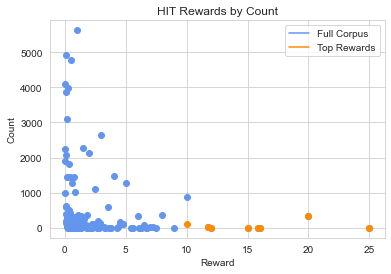

In [145]:
#df -vs- tr comparison plot

plt.scatter(X1, Y1, color='cornflowerblue')
plt.scatter(X2, Y2, color='darkorange')

plt.xlabel("Reward (Dollars (USD))")
plt.ylabel("Count")

plt.plot(1, color='cornflowerblue', label='Full Corpus')
plt.plot(1, color='darkorange', label='Top Rewards')

plt.title("HIT Rewards by Count")
plt.legend(loc='upper right')

plt.show()


In [167]:
#density plot
#plt.xlabel('Reward')
#plt.ylabel('Density')
#plt.title('HIT Rewards by Probability Density')
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,100))

#from matplotlib.ticker import FormatStrFormatter

#sns.distplot(dfG.Reward, bins=50, label='Full Corpus').xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#sns.distplot(trG.Reward, bins=5, label='Top Rewards').xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#plt.title('Linear Regression Plot (Full Corpus)')

#plt.legend(loc='upper right')


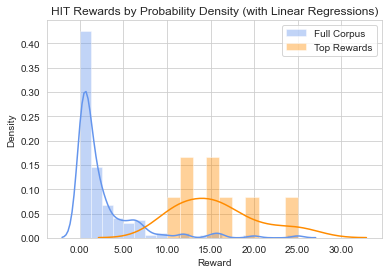

In [168]:
#density plot
plt.xlabel('Reward')
plt.ylabel('Density')
plt.title('HIT Rewards by Probability Density')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,100))

from matplotlib.ticker import FormatStrFormatter

sns.distplot(dfG.Reward, bins=20, color='cornflowerblue', label='Full Corpus').xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
sns.distplot(trG.Reward, bins=10, color='darkorange', label='Top Rewards').xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.title('HIT Rewards by Probability Density (with Linear Regressions)')

plt.legend(loc='upper right')
